### Stock Market Prediction And Forecasting Using Stacked LSTM


https://medium.com/@quantpanda123/creating-a-nifty-50-stock-database-using-python-d6ffb56e011e

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy

### Create the Stacked LSTM model
import tensorflow as tf
# tf.__version__
# !pip install tensorflow
# !pip install tensorflow --upgrade --force-reinstall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM

# import tensorflow

In [ ]:
## stock prediction 
1. 

,Index Name,Date,Open,High,Low,Close
0,NIFTY FINANCIAL SERVICES,01 Mar 2024,20446.10,20863.65,20446.10,20842.7
1,NIFTY FINANCIAL SERVICES,29 Feb 2024,20306.85,20495.40,20234.75,20407.9
2,NIFTY FINANCIAL SERVICES,28 Feb 2024,20577.05,20627.90,20293.35,20340.4
3,NIFTY FINANCIAL SERVICES,27 Feb 2024,20564.85,20631.30,20527.95,20552.9
4,NIFTY FINANCIAL SERVICES,26 Feb 2024,20585.85,20724.20,20585.25,20619.7


2272

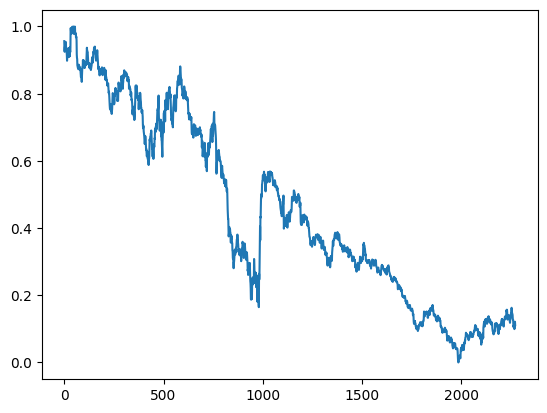

In [2]:
df=pd.read_csv('../data/stock_metadata/NIFTY BANK_Data.csv')
# df=pd.read_csv("../data/stock_metadata/NIFTY FINANCIAL SERVICES_Historical_PR_01032018to09022024.csv")
df=pd.read_csv("../data/stock_metadata/NIFTY FINANCIAL SERVICES_Historical_PR_01012015to02032024.csv")

display(df.head(),len(df))

df1=df.reset_index()['Close']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
plt.plot(df1)

In [6]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# print(df1)

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
# print(test_data)
print('Train test size',training_size,test_size)
# train_data


# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print('Train shape',X_train.shape,y_train.shape)
print('Test_shape',X_test.shape,ytest.shape)


# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Train test size 1476 796
Train shape (1375, 100) (1375,)
Test_shape (695, 100) (695,)


In [4]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam', run_eagerly=True)
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

22/22 [==============================] - 48s 2s/step - loss: 0.0421 - val_loss: 0.0133
Epoch 2/100
22/22 [==============================] - 47s 2s/step - loss: 0.0044 - val_loss: 0.0013
Epoch 3/100
22/22 [==============================] - 51s 2s/step - loss: 0.0021 - val_loss: 2.4732e-04
Epoch 4/100
22/22 [==============================] - 45s 2s/step - loss: 0.0016 - val_loss: 2.6350e-04
Epoch 5/100
22/22 [==============================] - 39s 2s/step - loss: 0.0016 - val_loss: 2.4956e-04
Epoch 6/100
22/22 [==============================] - 39s 2s/step - loss: 0.0016 - val_loss: 2.6525e-04
Epoch 7/100
22/22 [==============================] - 40s 2s/step - loss: 0.0015 - val_loss: 2.7346e-04
Epoch 8/100
22/22 [==============================] - 46s 2s/step - loss: 0.0015 - val_loss: 2.8463e-04
Epoch 9/100
22/22 [==============================] - 41s 2s/step - loss: 0.0015 - val_loss: 2.8232e-04
Epoch 10/100
22/22 [==============================] - 40s 2s/step - loss: 0.0014

In [16]:


# model.save('..\data\stock_metadata\models/lstm_fin_nifty_prediction_01012015to02032024.keras')

# model=tf.keras.saving.load_model('../data/stock_metadata/models/lstm_bank_nifty_prediction.keras')
# model=tf.keras.saving.load_model('../data/stock_metadata/models/lstm_fin_nifty_prediction.keras')

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 1s 46ms/step


In [18]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [19]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.031740416722797406

In [20]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.03522955310899525

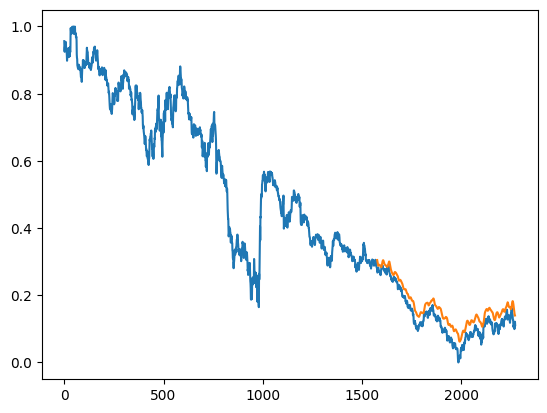

In [21]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
test_data.shape

(796, 1)

In [23]:
# x_input=test_data[942:].reshape(1,-1) ## bank 
# x_input=test_data[415:].reshape(1,-1) ## fin
x_input=test_data[696:].reshape(1,-1) ## fin
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()
len(test_data)



796

In [24]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100

i=0
while(i<10):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

In [25]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [26]:
import matplotlib.pyplot as plt

In [27]:
len(df1)

2272

In [57]:
# df1
# 2980
df1.shape

(2272, 1)

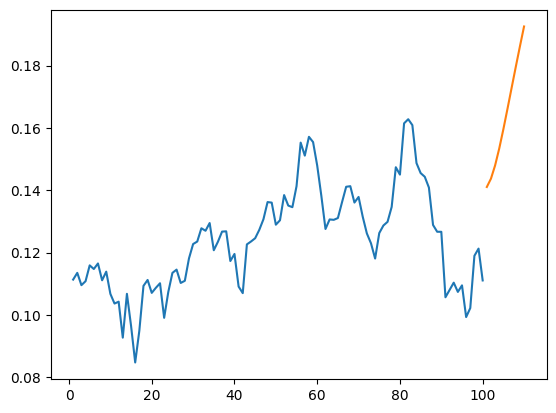

In [29]:
# plt.plot(day_new,scaler.inverse_transform(df1[2880:])) ## bank
plt.plot(day_new,scaler.inverse_transform(df1[2172:]))


plt.plot(day_pred,scaler.inverse_transform(lst_output))


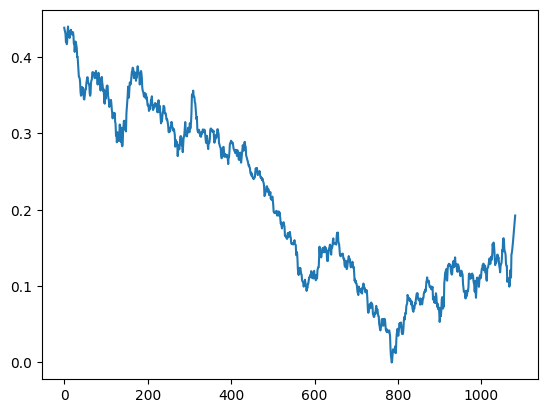

In [37]:
df3=df1.tolist()

df3.extend(lst_output)
plt.plot(df3[1200:])

In [38]:
df3=scaler.inverse_transform(df3).tolist()

In [40]:
df3

[[20842.7],
 [20407.9],
 [20340.4],
 [20552.9],
 [20619.7],
 [20677.1],
 [20665.9],
 [20686.75],
 [20800.85],
 [20548.9],
 [20472.75],
 [20416.15],
 [20325.55],
 [20190.5],
 [19918.5],
 [20203.3],
 [20064.7],
 [20443.65],
 [20365.5],
 [20315.85],
 [20434.05],
 [20516.65],
 [20497.5],
 [20285.5],
 [20413.35],
 [20099.4],
 [20206.4],
 [20137.05],
 [20542.05],
 [20425.35],
 [20324.05],
 [20528.9],
 [21447.15],
 [21461.35],
 [21300.7],
 [21249.2],
 [21224.3],
 [21197.25],
 [21292.45],
 [21514.2],
 [21516.6],
 [21256.55],
 [21346.15],
 [21457.1],
 [21487.45],
 [21534.1],
 [21465.7],
 [21261.65],
 [21197.15],
 [21326.0],
 [21201.25],
 [21434.45],
 [21444.9],
 [21529.75],
 [21461.25],
 [21171.2],
 [21173.25],
 [21214.7],
 [21213.85],
 [21023.45],
 [21026.75],
 [21055.8],
 [20862.9],
 [20211.0],
 [20054.65],
 [20000.35],
 [19702.65],
 [19652.0],
 [19587.25],
 [19566.3],
 [19612.1],
 [19518.6],
 [19554.3],
 [19732.25],
 [19722.85],
 [19542.15],
 [19657.25],
 [19571.05],
 [19491.95],
 [19510.9],

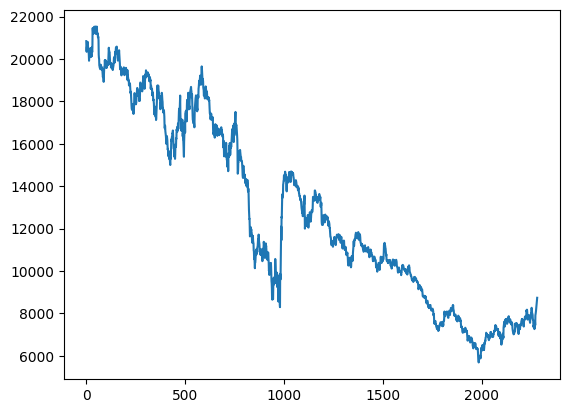

In [39]:
plt.plot(df3)

In [62]:
time_step = 100


INFO:tensorflow:Assets written to: ..\data\stock_metadata\models/lstm_fin_nifty_prediction.\assets


INFO:tensorflow:Assets written to: ..\data\stock_metadata\models/lstm_fin_nifty_prediction.\assets
